In [1]:
# load the required libraries 
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy import signal
import pulp as lp
import os
import h5py
# pandas is a python librarydedicated to data manipulation and analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree._tree import DTYPE
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasRegressor
from sklearn.tree import export_text
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sklearn
from scipy.fft import rfft, rfftfreq, fft, fftfreq, fftshift

C:\Users\berka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\berka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 1. Preprocessing
<br>
<div style="text-align: justify;">
Preprocessing contains reading and visualizing the input data. There are 493 samples in the input data in the given scenario that has 23 columns representing the features and two columns representing the class label as string and integer respectively. Visualizing the input data as a distribution of classes according to the each feature can be seen below.
</div>

In [2]:
data = pd.read_csv("Data_with_number_labels.csv")
data

,IA_WALL_THICKNESS_AIRFOIL_C1,IA_WALL_THICKNESS_AIRFOIL_F2,IA_WALL_THICKNESS_AIRFOIL_K3,IA_WALL_THICKNESS_AIRFOIL_C5,IA_WALL_THICKNESS_AIRFOIL_F6,IA_WALL_THICKNESS_AIRFOIL_K7,IA_WALL_THICKNESS_AIRFOIL_C9,IA_WALL_THICKNESS_AIRFOIL_F10,IA_WALL_THICKNESS_AIRFOIL_K11,IA_WALL_THICKNESS_AIRFOIL_C12,...,IA_WALL_THICKNESS_AIRFOIL_C20,IA_WALL_THICKNESS_AIRFOIL_F21,IA_WALL_THICKNESS_AIRFOIL_K22,IA_WALL_THICKNESS_AIRFOIL_C23,IA_WALL_THICKNESS_AIRFOIL_D24,IA_WALL_THICKNESS_AIRFOIL_F25,IA_WALL_THICKNESS_AIRFOIL_H26,IA_WALL_THICKNESS_AIRFOIL_K27,Disposition,Labels_as_Integers
0,3.9,2.2,1.6,4.9,2.9,3.0,3.7,3.1,2.7,5.3,...,3.9,2.3,1.2,1.6,1.6,1.8,1.3,1.0,Use as is,0
1,4.0,2.2,1.3,4.1,2.4,1.9,3.5,2.5,2.0,6.0,...,4.2,3.0,2.2,1.7,1.7,1.8,1.7,1.5,Use as is,0
2,3.7,2.1,1.3,4.6,2.5,2.3,3.4,2.4,2.1,6.2,...,4.3,2.9,1.9,1.6,1.5,1.9,1.7,1.3,Use as is,0
3,4.1,2.3,1.2,4.6,2.5,1.8,3.6,2.7,2.0,4.9,...,4.5,3.1,2.4,2.0,1.8,2.1,1.7,1.8,Use as is,0
4,3.6,2.2,1.2,4.6,2.5,2.1,3.9,2.7,1.9,6.4,...,4.0,2.8,2.4,1.7,1.8,2.3,1.9,1.8,Use as is,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,4.3,2.3,1.3,4.7,2.6,2.0,3.5,2.6,2.1,5.2,...,3.9,2.4,1.9,1.6,1.4,1.5,1.2,1.4,Use as is,0
489,4.0,2.3,1.8,4.7,2.3,1.9,3.5,2.6,1.6,5.2,...,4.0,2.8,2.5,1.5,1.5,2.0,1.8,1.8,Use as is,0
490,4.7,3.6,3.0,5.4,3.7,3.4,4.0,3.2,3.2,4.6,...,3.6,2.2,1.4,1.6,1.5,1.7,1.1,0.9,Use as is,0
491,4.7,3.6,3.0,5.4,3.7,3.4,4.0,3.2,3.2,4.6,...,3.6,2.2,1.4,1.6,1.5,1.7,1.1,0.9,Use as is,0


In [3]:
Features= ["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27"]
Label= 'Labels_as_Integers'
X, y = data[Features].values, data[Label]
for n in range(0,22):
    print(f"Instant {str(n+1)}, \n  Features: {list(X[n])} \n  Label: {y[n]}")

Instant 1, 
  Features: [3.9, 2.2, 1.6, 4.9, 2.9, 3.0, 3.7, 3.1, 2.7, 5.3, 4.7, 3.1, 6.3, 4.5, 1.7, 3.9, 2.3, 1.2, 1.6, 1.6, 1.8, 1.3, 1.0] 
  Label: 0
Instant 2, 
  Features: [4.0, 2.2, 1.3, 4.1, 2.4, 1.9, 3.5, 2.5, 2.0, 6.0, 5.3, 3.3, 7.2, 5.0, 2.8, 4.2, 3.0, 2.2, 1.7, 1.7, 1.8, 1.7, 1.5] 
  Label: 0
Instant 3, 
  Features: [3.7, 2.1, 1.3, 4.6, 2.5, 2.3, 3.4, 2.4, 2.1, 6.2, 5.0, 3.4, 7.5, 4.6, 2.8, 4.3, 2.9, 1.9, 1.6, 1.5, 1.9, 1.7, 1.3] 
  Label: 0
Instant 4, 
  Features: [4.1, 2.3, 1.2, 4.6, 2.5, 1.8, 3.6, 2.7, 2.0, 4.9, 5.1, 3.5, 6.9, 4.5, 3.1, 4.5, 3.1, 2.4, 2.0, 1.8, 2.1, 1.7, 1.8] 
  Label: 0
Instant 5, 
  Features: [3.6, 2.2, 1.2, 4.6, 2.5, 2.1, 3.9, 2.7, 1.9, 6.4, 4.8, 3.7, 7.2, 5.2, 3.0, 4.0, 2.8, 2.4, 1.7, 1.8, 2.3, 1.9, 1.8] 
  Label: 0
Instant 6, 
  Features: [3.8, 2.2, 1.3, 4.5, 2.7, 2.4, 3.4, 2.5, 2.7, 5.9, 4.7, 3.2, 6.8, 4.4, 2.6, 4.1, 2.9, 1.6, 1.7, 1.7, 1.9, 1.3, 1.1] 
  Label: 0
Instant 7, 
  Features: [3.5, 1.9, 1.3, 4.4, 2.4, 1.9, 3.3, 2.3, 2.4, 6.0, 5.1, 3.7, 6.5

# 2.Training
<br>
<div style="text-align: justify;">
Training of decison tree models contains fitting the model with the training data set. Since integrating the domain knowledge into a decision tree model will be made by creating a model with self defined structure, this chapter is followed by train-test data split, training of a decision tree without domain knowledge, creating and training a decision tree with custom structure/ domain knowledge.
</div>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
y_test = y_test.values.reshape(-1,1)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')
y_train

X_train: (394, 23) 
X_test: (99, 23) 
y_train: (394,) 
y_test: (99, 1)


6      0
407    0
108    0
186    1
297    0
      ..
323    0
192    1
117    0
47     0
172    0
Name: Labels_as_Integers, Length: 394, dtype: int64

## 2.1. Decision Tree without Domain Knowledge
<br>
<div style="text-align: justify;">
For the simplicity, the decision tree model of sklearn will be used as a standard decision tree model
</div>

In [5]:
standard_tree = DecisionTreeClassifier()
standard_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 2.2. Decision Tree with Domain Knowledge
<br>
<div style="text-align: justify;">
To integrate the domain knowledge the tree structure will be self defined (see next block). Again, the model of sklearn will be used for restructuring to make the comparison with the same model parameters. 
</div>

In [6]:
class CustomDecisionTreeClassifier(DecisionTreeClassifier):
    def __init__(self, threshold1, threshold2, threshold3, threshold4, threshold5,  max_depth=None, **kwargs):
        """
        Initiliazing the model as defining the parameters that will be used in fitting and prediction.
        
        Args:
            thresholdX: different threshold values for corresponding conditions
            max_depth: the max depth of the tree
        
        Return:
            None.
        """
        self.threshold1 = threshold1
        self.threshold2 = threshold2
        self.threshold3 = threshold3
        self.threshold4 = threshold4
        self.threshold5 = threshold5
        self.dt_model = DecisionTreeClassifier(max_depth=max_depth, **kwargs)
        self.is_fitted = False # To check, if the model is fitted.

    def fit(self, X, y):
        
        """
        The input data for fitting will be not the data in training data set. Instead, the data in the data set will be 
        transformed to the result of the corresponding condition. Since there are nine pair conditions, the shape of the X will 
        be increased. 
        
        Args:
            X: data in the training data set
            y: true labels of the training data set
        
        Returns:
            Fitted model
        """
        
        # Increasing the shape of X by 9
        modified_X = X.copy()
        modified_X = np.hstack((modified_X, np.zeros((modified_X.shape[0], 9), dtype=int)))
        
        # Condition1 >= Threshold1 means class 0, and 1 otherwise        
        modified_X[:,0] = (X[:, 0] - 3.2 ) < self.threshold1

        # Condition2 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,1] = (X[:, 1] - 1.8 ) < self.threshold1
        
        # Condition3 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,2] = (X[:, 2] - 1.4 ) < self.threshold1
        
        # Condition4 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,3] = (X[:, 3] - 3.6 ) < self.threshold1

        # Condition5 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,4] = (X[:, 4] - 2.1 ) < self.threshold1
        
        # Condition6>= Threshold2 means class 0, and 1 otherwise
        modified_X[:,5] = (X[:, 5] - 1.6 ) < self.threshold2
        
        # Condition7 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,6] = (X[:, 6] - 2.7 ) < self.threshold1
        
        # Condition8 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,7] = (X[:, 7] - 1.9 ) < self.threshold1
        
        # Condition9 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,8] = (X[:, 8] - 1.7 ) < self.threshold1
        
        # Condition10 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,9] = (X[:, 9] - 4.2 ) < self.threshold1
        
        # Condition11 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,10] = (X[:, 10] - 2.6 ) < self.threshold1
        
        # Condition12 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,11] = (X[:, 11] - 1.4 ) < self.threshold1
        
        # Condition13 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,12] = (X[:, 12] - 5.2 ) < self.threshold1
        
        # Condition14 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,13] = (X[:, 13] - 2.9 ) < self.threshold1
        
        # Condition15 >= Threshold2 means class 0, and 1 otherwise
        modified_X[:,14] = (X[:, 14] - 1.6 ) < self.threshold2
        
        # Condition16 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,15] = (X[:, 15] - 2.9 ) < self.threshold1
        
        # Condition17 >= Threshold1 means class 0, and 1 otherwise
        modified_X[:,16] = (X[:, 16] - 1.7 ) < self.threshold1
        
        # Condition18 >= Threshold3 means class 0, and 1 otherwise
        modified_X[:,17] = (X[:, 17] - 1.3 ) < self.threshold3
        
        # Condition19 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,18] = (X[:, 18] - 0.9 ) < self.threshold4
        
        # Condition20 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,19] = (X[:, 19] - 0.9 ) < self.threshold4

        # Condition21 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,20] = (X[:, 20] - 0.9 ) < self.threshold4

        # Condition22 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,21] = (X[:, 21] - 0.9 ) < self.threshold4

        # Condition23 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,22] = (X[:, 22] - 0.9 ) < self.threshold4
        
        # --------------------------- Pair Conditions ---------------------------
        
        # Condition24 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,23] = (X[:, 0] - 3.2 + X[:, 9] - 4.2) < self.threshold5
        
        # Condition25 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,24] = (X[:, 1] - 1.8 + X[:, 10] - 2.6) < self.threshold5
        
        # Condition26 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,25] = (X[:, 2] - 1.4 + X[:, 11] - 1.4) < self.threshold5
        
        # Condition27 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,26] = (X[:, 3] - 3.6 + X[:, 12] - 5.2) < self.threshold5
        
        # Condition28 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,27] = (X[:, 4] - 1.8 + X[:, 13] - 2.9) < self.threshold5
        
        # Conditio29 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,28] = (X[:, 5] - 1.4 + X[:, 14] - 1.6) < self.threshold5
        
        # Condition30 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,29] = (X[:, 6] - 2.7 + X[:, 15] - 2.9) < self.threshold5
        
        # Condition31 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,30] = (X[:, 7] - 1.9 + X[:, 16] - 1.7) < self.threshold5
        
        # Condition32 >= Threshold4 means class 0, and 1 otherwise
        modified_X[:,31] = (X[:, 8] - 1.7 + X[:, 17] - 1.3) < self.threshold5

        # Training the decision tree model with modified features
        self.dt_model.fit(modified_X, y)
        self.is_fitted = True
        
    def predict(self, X):
        if not self.is_fitted:
            raise NotFittedError("This CustomDecisionTreeClassifier instance is not fitted yet.")
        
        return self.dt_model.predict(X)
   
    def predict_with_constraints(self, X):
        
        """
        Predictions with constraints. The predictions of the model are first set to 0 meaning that all predictions start 
        with the class "0" representing "use as is". The conditions will be tested and constraints will be applied. This
        is called hard constraints: the model must stay in the constraint boundary and cannot violate any constraint. 
        The prediction for those samples where the condition combined with a logical-or operator results in a true (1) will
        be 1 representing the class "scrap".
        
        Args:
            X: data in the training data set
        
        Returns:
            Predictions with constraints
        """
        
        # Attending the predictions to 0 at the beginning
        predictions = np.zeros(X.shape[0], dtype=int)
        
        # Applying custom constraints:
        # Condition1 < Threshold1 means class 1 representing "scrap"
        condition1_mask = X[:, 0] - 3.2 < self.threshold1

        # Condition2 < Threshold1 means class 1
        condition2_mask = X[:, 1] - 1.8 < self.threshold1

        # Condition3 < Threshold1 means class 1
        condition3_mask = X[:, 2] - 1.4 < self.threshold1

        # Condition4 < Threshold1 means class 1
        condition4_mask = X[:, 3] - 3.6 < self.threshold1

        # Condition5 < Threshold1 means class 1
        condition5_mask = X[:, 4] - 2.1 < self.threshold1

        # Condition6< Threshold2 means class 1
        condition6_mask = X[:, 5] - 1.6 < self.threshold2

        # Condition7 < Threshold1 means class 1
        condition7_mask = X[:, 6] - 2.7 < self.threshold1

        # Condition8 < Threshold1 means class 1
        condition8_mask = X[:, 7] - 1.9 < self.threshold1

        # Condition9 < Threshold1 means class 1
        condition9_mask = X[:, 8] - 1.7 < self.threshold1

        # Condition10 < Threshold1 means class 1
        condition10_mask = X[:, 9] - 4.2 < self.threshold1

        # Condition11 < Threshold1 means class 1
        condition11_mask = X[:, 10] - 2.6 < self.threshold1

        # Condition12 < Threshold1 means class 1
        condition12_mask = X[:, 11] - 1.4 < self.threshold1

        # Condition13 < Threshold1 means class 1
        condition13_mask = X[:, 12] - 5.2 < self.threshold1

        # Condition14 < Threshold1 means class 1
        condition14_mask = X[:, 13] - 2.9 < self.threshold1

        # Condition15 < Threshold2 means class 1
        condition15_mask = X[:, 14] - 1.6 < self.threshold2

        # Condition16 < Threshold1 means class 1
        condition16_mask = X[:, 15] - 2.9 < self.threshold1

        # Condition17 < Threshold1 means class 1
        condition17_mask = X[:, 16] - 1.7 < self.threshold1

        # Condition18 < Threshold3 means class 1
        condition18_mask = X[:, 17] - 1.3 < self.threshold3

        # Condition19 < Threshold4 means class 1
        condition19_mask = X[:, 18] - 0.9 < self.threshold4

        # Condition20 < Threshold4 means class 1
        condition20_mask = X[:, 19] - 0.9 < self.threshold4

        # Condition21 < Threshold4 means class 1
        condition21_mask = X[:, 20] - 0.9 < self.threshold4

        # Condition22 < Threshold4 means class 1
        condition22_mask = X[:, 21] - 0.9 < self.threshold4

        # Condition23 < Threshold4 means class 1
        condition23_mask = X[:, 22] - 0.9 < self.threshold4

        # --------------------------- Pair Conditions ---------------------------

        # Condition24 >= Threshold4 means class 0, and 1 otherwise
        condition24_mask = (X[:, 0] - 3.2 + X[:, 9] - 4.2) < self.threshold5
        
        # Condition25 >= Threshold4 means class 0, and 1 otherwise
        condition25_mask = (X[:, 1] - 1.8 + X[:, 10] - 2.6) < self.threshold5
        
        # Condition26 >= Threshold4 means class 0, and 1 otherwise
        condition26_mask = (X[:, 2] - 1.4 + X[:, 11] - 1.4) < self.threshold5
        
        # Condition27 >= Threshold4 means class 0, and 1 otherwise
        condition27_mask = (X[:, 3] - 3.6 + X[:, 12] - 5.2) < self.threshold5
        
        # Condition28 >= Threshold4 means class 0, and 1 otherwise
        condition28_mask = (X[:, 4] - 1.8 + X[:, 13] - 2.9) < self.threshold5
        
        # Conditio29 >= Threshold4 means class 0, and 1 otherwise
        condition29_mask = (X[:, 5] - 1.4 + X[:, 14] - 1.6) < self.threshold5
        
        # Condition30 >= Threshold4 means class 0, and 1 otherwise
        condition30_mask = (X[:, 6] - 2.7 + X[:, 15] - 2.9) < self.threshold5
        
        # Condition31 >= Threshold4 means class 0, and 1 otherwise
        condition31_mask = (X[:, 7] - 1.9 + X[:, 16] - 1.7) < self.threshold5
        
        # Condition32 >= Threshold4 means class 0, and 1 otherwise
        condition32_mask = (X[:, 8] - 1.7 + X[:, 17] - 1.3) < self.threshold5
        
        # The result of the combined condition can be either true (1) representing "scrap" or false (0) representing "use as is"
        combined_condition = np.logical_or.reduce([condition1_mask, condition2_mask, condition3_mask, condition4_mask, condition5_mask, \
                                                   condition6_mask, condition7_mask, condition8_mask, condition9_mask, condition10_mask, \
                                                   condition11_mask, condition12_mask, condition13_mask, condition14_mask, condition15_mask, \
                                                   condition16_mask, condition17_mask, condition18_mask, condition19_mask, condition20_mask, \
                                                   condition21_mask, condition22_mask, condition23_mask,condition24_mask, condition25_mask, \
                                                   condition26_mask, condition27_mask, condition28_mask, condition29_mask, condition30_mask, \
                                                   condition31_mask, condition32_mask])
        
        # Attending the class 1 to those samples whose combined condition is true
        predictions[combined_condition]= 1
   
        return predictions

    def generate_tree_text(self, feature_names):
        
        # Generating the tree structure as text
        if not self.is_fitted:
            raise NotFittedError("This CustomDecisionTreeClassifier instance is not fitted yet.")

        return export_text(self.dt_model, feature_names=feature_names)
    
    def generate_plot_tree(self, feature_names):
        
        # Generating the tree structure visualized
        if not self.is_fitted:
            raise NotFittedError("This CustomDecisionTreeClassifier instance is not fitted yet.")

        return plot_tree(self.dt_model, feature_names=feature_names)


In [7]:
# Setting threshold values
threshold1 = -0.2 # for measure points (1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21)
threshold2 = -0.3 # for measure points (7, 18)
threshold3 = -0.4 # for measure point 22
threshold4 = 0.0 # for measure points (23, 24, 25, 26, 27)
threshold5 = 0.0 # for pair measure points

# Creating and fitting the custom decision tree classifier
custom_tree = CustomDecisionTreeClassifier(threshold1=threshold1, threshold2=threshold2, threshold3=threshold3, threshold4=threshold4, threshold5=threshold5)
custom_tree.fit(X_train,y_train)

# 3 Test
<br>
<div style="text-align: justify;">
Both models with- and without domain knowledge will be tested and evaluated with their accuracy score and confusion matrix.
</div>

In [8]:
# Getting the predictions of the domain knowledge model for the given test data set:
predictions = custom_tree.predict_with_constraints(X_test)

In [9]:
# Getting the confusion matrix of the domain knowledge model for the given test data set:
mcm_custom = confusion_matrix(y_test, predictions)
mcm_custom

array([[70,  7],
       [ 0, 22]], dtype=int64)

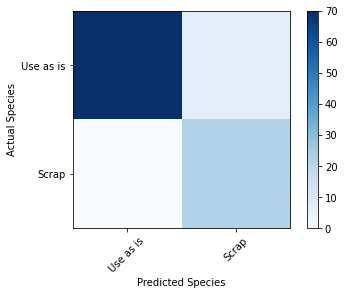

In [10]:
# Visualizing the confusion matrix:
Classes= ['Use as is', 'Scrap']
plt.imshow(mcm_custom, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(Classes))
plt.xticks(tick_marks, Classes, rotation=45)
plt.yticks(tick_marks, Classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [11]:
# Getting the predictions of the standard model for the given test data set:
predictions_without_constraints = standard_tree.predict(X_test)

In [12]:
# Getting the confusion matrix of the standard model for the given test data set:
confusion_matrix(y_test, predictions_without_constraints)

array([[77,  0],
       [ 2, 20]], dtype=int64)

In [13]:
# Accuracy of both models on the given test data set
accuracy_with_constraints = accuracy_score(y_test, predictions)
accuracy_without_constraints = accuracy_score(y_test, predictions_without_constraints)
print("Accuracy with constraints:", accuracy_with_constraints)
print("Accuracy without constraints:", accuracy_without_constraints)

Accuracy with constraints: 0.9292929292929293
Accuracy without constraints: 0.9797979797979798


# Inspection of the models' structure
<br>
<div style="text-align: justify;">
Since the structure of models is differently created, inspecting of how both models decide can be intriguing. Next, the structure of both models can be observed as text and visualized block as well.
</div>

In [14]:
# Structure of the standard model as text:
tree_text_standard = export_text(standard_tree, feature_names=["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27"])
print(tree_text_standard)

|--- IA_WALL_THICKNESS_AIRFOIL_K27 <= 0.85
|   |--- class: 1
|--- IA_WALL_THICKNESS_AIRFOIL_K27 >  0.85
|   |--- IA_WALL_THICKNESS_AIRFOIL_K3 <= 1.15
|   |   |--- class: 1
|   |--- IA_WALL_THICKNESS_AIRFOIL_K3 >  1.15
|   |   |--- IA_WALL_THICKNESS_AIRFOIL_H26 <= 0.85
|   |   |   |--- class: 1
|   |   |--- IA_WALL_THICKNESS_AIRFOIL_H26 >  0.85
|   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C5 <= 3.35
|   |   |   |   |--- class: 1
|   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C5 >  3.35
|   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K14 <= 1.15
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K14 >  1.15
|   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C23 <= 0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C23 >  0.85
|   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K11 <= 1.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K11 >  1.25
|   |   |   |   |   |   

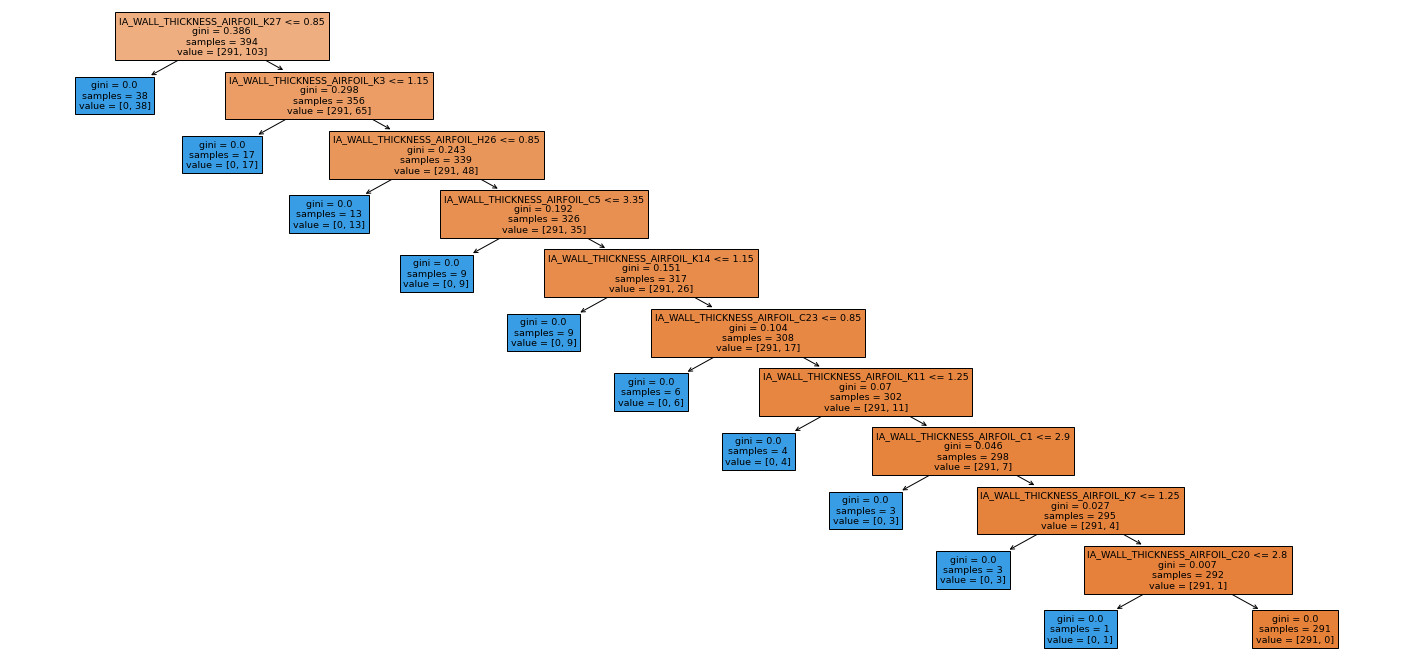

In [15]:
# Structure of the standard model as visualized blocks:
plt.figure(figsize=(25, 12))
plot_tree(standard_tree, feature_names=["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27"], filled=True)
plt.show()

In [16]:
# Structure of the domain knowledge model as text:
tree_text = custom_tree.generate_tree_text(["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27", "Condition_24", "Condition_25", "Condition_26", "Condition_27", "Condition_28", "Condition_29", "Condition_30", "Condition_31", "Condition_32"])
print(tree_text)

|--- IA_WALL_THICKNESS_AIRFOIL_K27 <= 0.50
|   |--- IA_WALL_THICKNESS_AIRFOIL_K3 <= 0.50
|   |   |--- IA_WALL_THICKNESS_AIRFOIL_H26 <= 0.50
|   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K14 <= 0.50
|   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C23 <= 0.50
|   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C5 <= 0.50
|   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_F2 <= 0.50
|   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K11 <= 0.50
|   |   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C20 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_C20 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K11 >  0.50
|   |   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_F6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- IA_WALL_THICKNESS_AIRFOIL_K7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

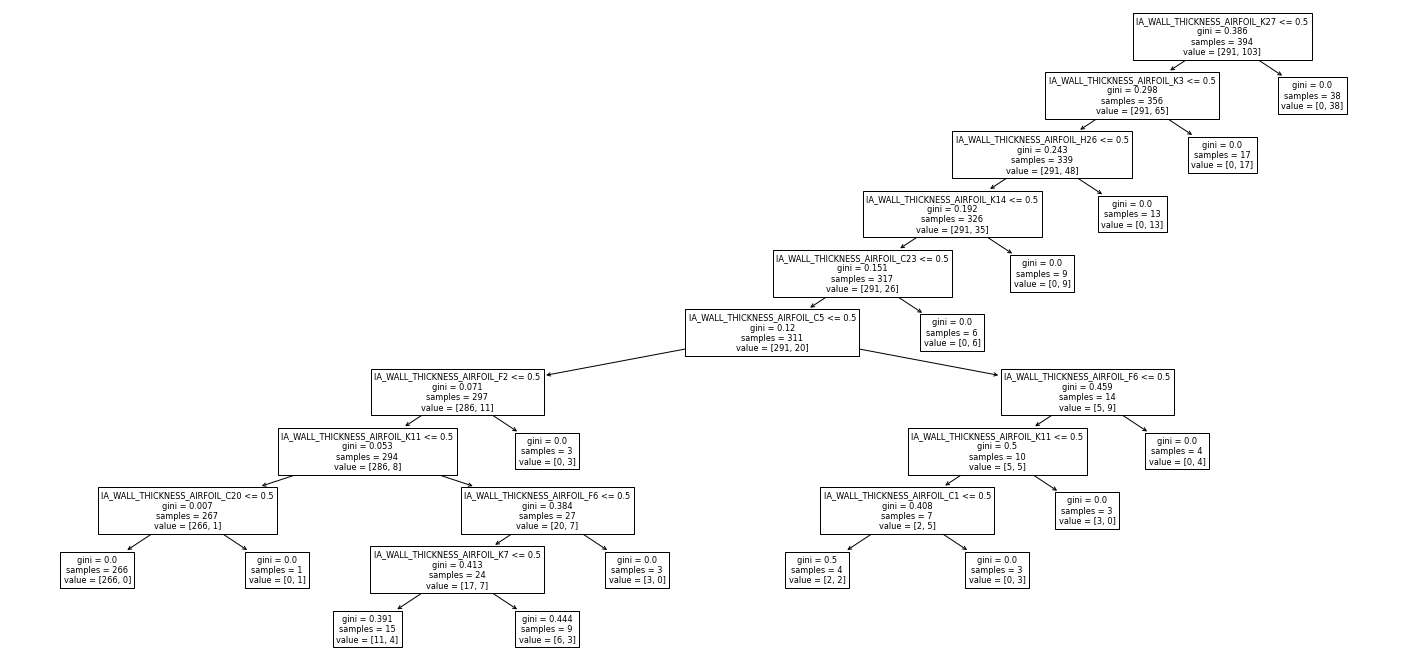

In [17]:
# Structure of the domain knowledge model as visualized blocks:
plt.figure(figsize=(25, 12))
custom_tree.generate_plot_tree(["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27", "Condition_24", "Condition_25", "Condition_26", "Condition_27", "Condition_28", "Condition_29", "Condition_30", "Condition_31", "Condition_32"])
plt.show()